# Mathematical Underpinnings - Lab 2

In [19]:
import numpy as np
import matplotlib.pyplot as plt

## Task 1

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

In [20]:
def population_risk(a, sigma_eps):
    return (a-1)**2 + sigma_eps**2

### b)

In [21]:
# sampling
n = 50
sigma_eps = 1
X = np.random.normal(0, 1, n)
Y = X + np.random.normal(0, sigma_eps, n)
XY_vec = np.array([X, Y]).T

print(XY_vec)

[[ 0.68489422 -0.86160569]
 [ 1.22086368  1.44113752]
 [ 0.27003968  2.04238868]
 [ 0.18497414 -1.79429994]
 [-0.80586781 -1.57040546]
 [ 0.53564104  1.3803493 ]
 [-0.01068308 -1.82651547]
 [ 0.36479185 -0.5098826 ]
 [ 1.06396388  1.68768111]
 [-0.74247984 -0.95725488]
 [ 0.81296123  0.59982268]
 [-0.46704747 -0.67458978]
 [ 0.38995292 -0.45997849]
 [-1.47247736 -1.830109  ]
 [ 0.23019307  1.38351539]
 [ 0.85649747  0.59901892]
 [ 1.50469887  1.4568391 ]
 [ 0.39925034 -0.3741416 ]
 [ 0.54939476  1.30842936]
 [-0.47506937 -0.43539996]
 [ 0.012477    0.57651591]
 [-0.26207674 -0.77933121]
 [-0.43164473 -0.9844761 ]
 [ 0.84841414  1.59246175]
 [ 0.00730102  0.3189504 ]
 [-0.32446116  0.0240591 ]
 [-0.74994813 -1.58361729]
 [ 0.91117303 -1.20897928]
 [ 0.43075491  0.64461015]
 [-0.72122575 -1.0542933 ]
 [ 1.12551822  1.2635429 ]
 [-0.28720899  0.02324425]
 [-0.77736862  0.00726642]
 [ 1.65963702  1.43576387]
 [-0.92847325 -0.60779954]
 [ 0.203347    1.08816396]
 [-0.09839788 -0.41416639]
 

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [24]:
def empirical_risk(a, x, y):
    return np.mean( (a*x - y)**2)


empirical_risk( 1, X, Y)

0.9707700429753433

### c)

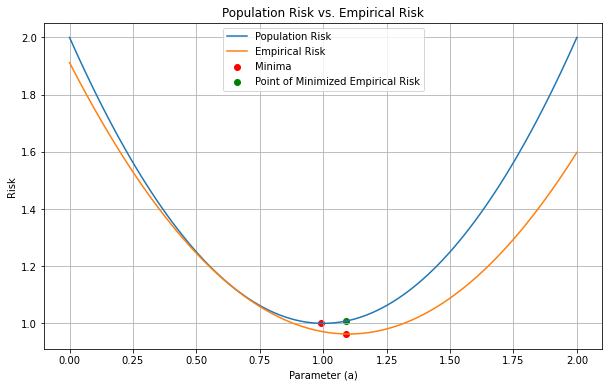

Argmin of Population Risk: 0.98989898989899
Min Population Risk: 1.0001020304050607
Argmin of Empirical Risk: 1.090909090909091
Min Empirical Risk: 0.9629722975254714
Population Risk at the Point Minimizing Empirical Risk: 1.0082644628099173


In [25]:
# Grid search for argmin and min of population risk
a_values = np.linspace(0, 2, 100)
population_risks = [population_risk(a, sigma_eps) for a in a_values]
argmin_population_risk = a_values[np.argmin(population_risks)]
min_population_risk = np.min(population_risks)

# Compute empirical risk for each 'a' in a range
empirical_risks = [empirical_risk(a, X, Y) for a in a_values]
argmin_empirical_risk = a_values[np.argmin(empirical_risks)]
min_empirical_risk = np.min(empirical_risks)

# Compute the value of the population risk at the point minimizing the empirical risk
population_risk_at_min_empirical_risk = population_risk(argmin_empirical_risk, sigma_eps)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(a_values, population_risks, label='Population Risk')
plt.plot(a_values, empirical_risks, label='Empirical Risk')
plt.scatter([argmin_population_risk, argmin_empirical_risk], [min_population_risk, min_empirical_risk], color='red', label='Minima')
plt.scatter(argmin_empirical_risk, population_risk_at_min_empirical_risk, color='green', label='Point of Minimized Empirical Risk')
plt.xlabel('Parameter (a)')
plt.ylabel('Risk')
plt.title('Population Risk vs. Empirical Risk')
plt.legend()
plt.grid(True)
plt.show()

print("Argmin of Population Risk:", argmin_population_risk)
print("Min Population Risk:", min_population_risk)
print("Argmin of Empirical Risk:", argmin_empirical_risk)
print("Min Empirical Risk:", min_empirical_risk)
print("Population Risk at the Point Minimizing Empirical Risk:", population_risk_at_min_empirical_risk)


### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [17]:
# excess risk
def excess_risk(a_opt, X, Y, sigma_eps):
    return population_risk(a_opt, sigma_eps) - empirical_risk(a_opt, X, Y)

In [48]:
# simulations for various sample sizes

from sklearn.linear_model import LinearRegression

# Number of simulations
sample_sizes = [10, 20, 40, 80, 160, 320, 640, 1280] 
num_simulations = 200 // len(sample_sizes)
sigma_eps = 1
excess_risks = []

for n in sample_sizes:
    excess_risks_for_n = []
    for _ in range(num_simulations):
        X = np.random.normal(0, 1, n)
        Y = X + np.random.normal(0, sigma_eps, n)
        
        # Fit linear regression model
        X_reshaped = X.reshape(-1, 1)  # Reshape X to be a column vector
        model = LinearRegression()
        model.fit(X_reshaped, Y)
        
        # Optimal parameter (slope of the linear model)
        a_opt = model.coef_[0]
        
        
        excess_risks_for_n.append(excess_risk(a_opt, X, Y, sigma_eps))
    avg_excess_risk_for_n = np.mean(excess_risks_for_n)
    excess_risks.append(avg_excess_risk_for_n)

print("Sample Size\tUnconditional Excess Risk")
for i in range(len(sample_sizes)):
    print(f"{sample_sizes[i]}\t\t{excess_risks[i]}")

Sample Size	Unconditional Excess Risk
10		0.20359319699776768
20		0.11411240151844709
40		0.06714740650349912
80		0.022616974259709544
160		0.012870012664357776
320		-0.00989626430557422
640		0.005376651766346549
1280		0.009844101959626586


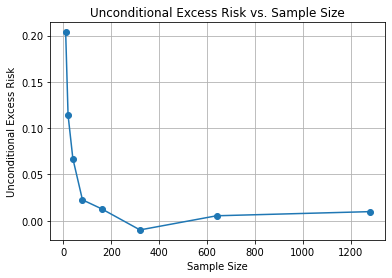

In [49]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)

plt.plot(sample_sizes, excess_risks, marker='o')
plt.xlabel('Sample Size')
plt.ylabel('Unconditional Excess Risk')
plt.title('Unconditional Excess Risk vs. Sample Size')
plt.grid(True)
plt.show()